In [1]:
import pandas as pd
import pydot
from IPython.display import SVG

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal import pycausal as pc
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

0* Imaginability TangibilityCondition 
1 AmountDonated Sympathy 
2 Impact 

forbiddirect

TangibilityCondition ==> Impact 
requiredirect

Sympathy ==> TangibilityCondition 

#### Load causal algorithms from the py-causal library and Run Bootstrapping FGES Mixed

In [5]:
from pycausal import search as s
fges = s.bootstrapFgesMixed(df, numCategoriesToDiscretize = 4, numBootstrapSamples = 5, penaltydiscount = 2, structurePrior = 1.0, maxDegree = -1, faithfulnessAssumed = True, verbose = True, 
priorKnowledge = prior)

#### Bootstrapping FGES Mixed's Result's Nodes

In [6]:
fges.getNodes()

[u'TangibilityCondition',
 u'AmountDonated',
 u'Sympathy',
 u'Imaginability',
 u'Impact']

#### Bootstrapping FGES Mixed's Result's Edges

In [7]:
fges.getEdges()

[u'Sympathy --- Impact [no edge]:0.0000[-->]:0.0000[<--]:0.0000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:1.0000',
 u'Imaginability --- Impact [no edge]:0.0000[-->]:0.0000[<--]:0.0000[o->]:0.0000[<-o]:0.0000[o-o]:0.0000[<->]:0.0000[---]:1.0000']

#### Plot The Result's Graph

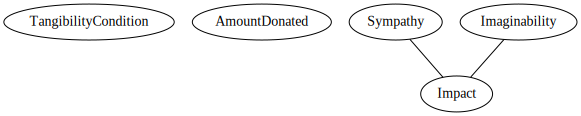

In [8]:
dot = fges.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

#### Stop Java VM

In [9]:
pc.stop_vm()